# Credit Card Approval Prediction

### TABLE OF CONTENTS
1. Reviewing of Datasets
2. Data Preparation
    - 2.1 Checking Null Values
    - 2.2 Checking Duplicate Records
    - 2.3 Joining Datasets
3. Data Exploration
    - 3.1 Continous Variables
    - 3.2 Catergorical Variables
    - 3.3 Continuous & Continuous Variables
    - 3.4 Categorical & Categorical Variables
    - 3.5 Categorical & Continuous Variables
4. Features Engineering 
    - 4.1 Creating Label
    - 4.2 Change Categorical Data to Frequency
    - 4.3 Checking Data Unbalance
5. Maching Learning
    - 5.1 Logistic Regression
    - 5.2 Support Vector Machine
    - 5.3 Random Forest
    - 5.4 XG Boost
    - 5.5 Result Comparison
6. Hyper-Parameter Tuning
    - 6.1 XB Boost Tuning
        - 6.1.1 Define DMatrix, Baseline Parameters, Evalution Metric and Max No. of Boosting Rounds
        - 6.1.2 Tune Max_Depth and Min_Child_Weight
        - 6.1.3 Tune Subsample and Colsample_Bytree
        - 6.1.4 Tune ETA
        - 6.1.5 Tuned Parameters
    - 6.2 Random Forest Tuning
        - 6.2.1 Define initial params range with RandomSearch
        - 6.2.2 Getting Best Params from GridSearch
        - 6.2.3 Tuned Parameters
7. Conclusion

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime as dt
import numpy as np

#For Cramers V calculation
from itertools import combinations
from scipy.stats import chi2_contingency
import scipy.stats as ss

#For machine learning preparation 
from sklearn.preprocessing import MinMaxScaler
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#For model prediction
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#For model evaluation test
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

#For hyperparameter turning
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### 1) REVIEWING OF DATASETS

In [2]:
#Read dataset files
credit_record = pd.read_csv("credit_record.csv")
app_record = pd.read_csv("application_record.csv")

In [3]:
#Snapshot of the contents in each file
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
app_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

### 2) DATA PREPARATION

#### 2.1) Checking Null Values

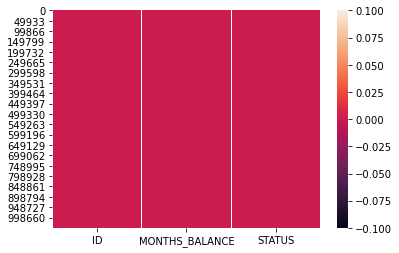

In [7]:
#Check for any null values in credit_record

sns.heatmap(credit_record.isnull()) 
plt.show()

#No null in all 3 columns

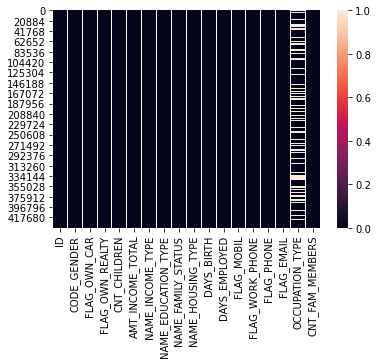

In [8]:
#Check for any null values in app_record

sns.heatmap(app_record.isnull()) 
plt.show()

#Null values found in OCCUPTATION_TYPE column

In [9]:
#Check the weight of null value in OCCUPATION_TYPE column

percent_null = (app_record.OCCUPATION_TYPE.isnull().sum()) / len(app_record.OCCUPATION_TYPE)*100
print('Percentage null: {:0.2f}%'.format(percent_null))

#Null value in OCCUPATION_TYPE column less than 50%. 
#Will not drop the column but will create new catergory for all null values.

Percentage null: 30.60%


In [10]:
#Created new catergory "Others" for null value. No null value in OCCUPATION_TYPE column

app_record2 = app_record["OCCUPATION_TYPE"].fillna("Others", inplace = True)

#Checking for any null value
app_record.OCCUPATION_TYPE.isnull().sum()

0

#### 2.2) Checking Duplicate Records

In [11]:
#Checking for any duplicating data based on ID in app_record. 

row = len(app_record.index)
unid = app_record.ID.nunique()

row_diff = row - unid

print("APP_RECORD")
print("Columns:"+format(row)+" - UniqueID:"+format(unid)+" =",row_diff)

#there are 47 differences before total columns to unique ID.

APP_RECORD
Columns:438557 - UniqueID:438510 = 47


In [12]:
#Look for any duplicate records. Table show all 47rows are duplicated.
app_record[app_record['ID'].duplicated(keep=False)].sort_values("ID")

#From the duplicated records, the features are different from one another. 
#Hence, there might be some issue when assigning ID to new applicant.

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,Others,1.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
425486,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,Others,3.0
428620,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
422068,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0


In [13]:
#Remove each 2nd duplicateed records from dataset
app_record = app_record.drop_duplicates(subset='ID', keep='first')

In [14]:
#Checking for any duplicating data based on ID in credit_record. 

row = len(credit_record.index)
unid = credit_record.ID.nunique()

row_diff = row - unid

print("CREDIT_RECORD")
print("Columns:"+format(row)+" - UniqueID:"+format(unid)+" =",row_diff)

#Total 1048575 rows and only 45985 unique ID.
#From the dataset snapshot above, there are repeated rows for monthly entry in each ID

CREDIT_RECORD
Columns:1048575 - UniqueID:45985 = 1002590


In [15]:
#Remove mulitple monthly entry and only keep the latest record. Keep the unique ID
credit_uniq = credit_record.groupby('ID').max().reset_index() 

In [16]:
#Verify for any duplicating data based on ID in credit_record after removing duplicates 

row = len(credit_uniq.index)
unid = credit_uniq.ID.nunique()

row_diff = row - unid

print("CREDIT_RECORD")
print("Columns:"+format(row)+" - UniqueID:"+format(unid)+" =",row_diff)

CREDIT_RECORD
Columns:45985 - UniqueID:45985 = 0


#### 2.3) Joining Datasets

In [17]:
#How many IDs do two tables share?
len(set(app_record['ID']).intersection(set(credit_uniq['ID']))) 

36457

In [18]:
#Inner join both dataset together by ID

df = app_record.join(credit_uniq.set_index('ID'), on='ID', how='inner')
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,0,X
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Others,2.0,0,X
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,X
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,X
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,X
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,X
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,X
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,Others,1.0,-4,X
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,Others,1.0,0,X
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,Others,1.0,-1,X


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 434812
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null

### 3) DATA EXPLORATION

Identify what are the Predictor(Input) & Target(output) variables and their data type and category.

| TYPE OF VARIABLE |||||
| - - - | - - - | - - - | - - - | - - - | 
| No. | Variable: |  Variable Type: | Data Type: | Variable Catergory: |
| 1 | CODE_GENDER | Predictor | Numeric | Categorical | 
| 2 | FLAG_OWN_CAR | Predictor | Character | Categorical |            
| 3 | FLAG_OWN_REALTY | Predictor | Character | Categorical |         
| 4 | CNT_CHILDREN | Predictor | Numeric | Contiunous |         
| 5 | AMT_INCOME_TOTAL | Predictor | Numeric | Contiunous |        
| 6 | NAME_INCOME_TYPE | Predictor | Character | Categorical |       
| 7 | NAME_EDUCATION_TYPE | Predictor | Character | Categorical |      
| 8 | NAME_FAMILY_STATUS | Predictor | Character | Categorical |      
| 9 | NAME_HOUSING_TYPE | Predictor | Character | Categorical |       
| 10| DAYS_BIRTH | Predictor | Numeric | Contiunous |               
| 11| DAYS_EMPLOYED | Predictor | Numeric | Contiunous |            
| 12| FLAG_MOBIL | Predictor | Numeric | Categorical |             
| 13| FLAG_WORK_PHONE | Predictor | Numeric | Categorical |           
| 14| FLAG_PHONE | Predictor | Numeric | Categorical |               
| 15| FLAG_EMAIL | Predictor | Numeric | Categorical |              
| 16| OCCUPATION_TYPE | Predictor | Character | Categorical |          
| 17| CNT_FAM_MEMBERS | Predictor | Numeric | Contiunous |   
| 18| MONTHS_BALANCE | Predictor | Numeric | Contiunous |    	
| 19| STATUS | Target | Character | Categorical |   

#### 3.1) Continous Variables
Lets understand the central tendency and spread of the variable for each Continuous Variables

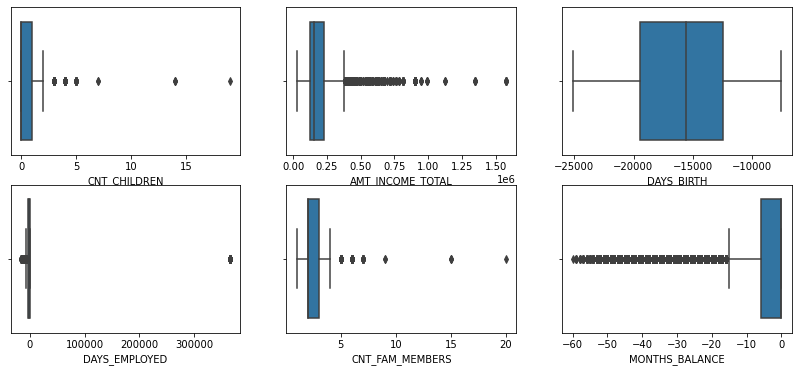

In [20]:
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))

sns.boxplot(x=df["CNT_CHILDREN"], ax=ax[0][0])
sns.boxplot(x=df["AMT_INCOME_TOTAL"], ax=ax[0][1])
sns.boxplot(x=df["DAYS_BIRTH"], ax=ax[0][2])
sns.boxplot(x=df["DAYS_EMPLOYED"], ax=ax[1][0])
sns.boxplot(x=df["CNT_FAM_MEMBERS"], ax=ax[1][1])
sns.boxplot(x=df["MONTHS_BALANCE"], ax=ax[1][2])

plt.show()

#From the boxplot below, DAYS_EMPLOYED have outliers of more then 30,0000days (82years) which is impossible. 
#Other features have outliers that more then 1.5x IQ however, the values are still resonable hence, we will keep it
#Decided to drop all datas in DAYS_EMPLOYED that more then 30,0000days

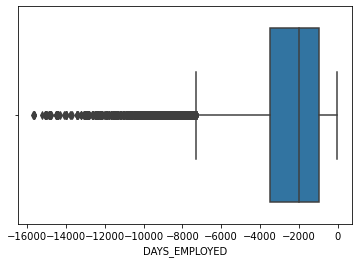

In [21]:
df2 = df[df['DAYS_EMPLOYED'] < 300000]
sns.boxplot(x=df2["DAYS_EMPLOYED"])
plt.show()  

#Boxplot after removing outlier from DAYS_EMPLOYED

#### 3.2) Categorical Variables
For categorical variables, we can use frequency table to understand distribution of each category.

In [22]:
feature = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
           "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_FAMILY_STATUS", 
           "FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "STATUS"]


for n in range(len(feature)):
    ct=df2[feature[n]].value_counts()
    wt=round((ct/len(df2.index)*100),2)
    
    res = pd.concat([ct, wt], axis=1)\
        .set_axis(['count', 'percent%'], axis=1, inplace=False)
    print("========",feature[n],"========\n",res,"\n")
    
#It seems that all of them are important since there is very fine classifcation in each column.
#Their effectiveness cannot be judged at this moment.

#Will drop FLAG_MOBIL as it 100% count 1 which no point to include into the model later on.
df3 = df2.drop(["FLAG_MOBIL"],axis='columns')

======== CODE_GENDER ========
    count  percent%
F  19195      63.3
M  11127      36.7 

======== FLAG_OWN_CAR ========
    count  percent%
N  17766     58.59
Y  12556     41.41 

======== FLAG_OWN_REALTY ========
    count  percent%
Y  19786     65.25
N  10536     34.75 

======== NAME_INCOME_TYPE ========
                       count  percent%
Working               18819     62.06
Commercial associate   8490     28.00
State servant          2985      9.84
Pensioner                17      0.06
Student                  11      0.04 

======== NAME_EDUCATION_TYPE ========
                                count  percent%
Secondary / secondary special  19867     65.52
Higher education                8858     29.21
Incomplete higher               1352      4.46
Lower secondary                  214      0.71
Academic degree                   31      0.10 

======== NAME_FAMILY_STATUS ========
                       count  percent%
Married               21137     69.71
Single / not married  

#### 3.3) Continuous & Continuous  Variables
We can use standard pearson coefficient to understand correlation between each continuous variables
- -1: perfect negative linear correlation
- +1:perfect positive linear correlation and 
- 0: No correlation

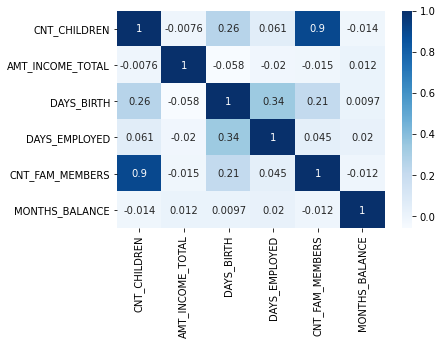

In [23]:
df4 = df3.drop(["ID","CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
           "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_FAMILY_STATUS", 
            "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "STATUS"],axis='columns')

corr = df4.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="Blues", annot=True)

plt.show()  

#CNT_CHILDREN and CNT_FAM_MEMBERS are more correlated to each other. 
#The reason must because the number of children is within the count of the family members.

#Next higher correlation are DAYS_BIRTH and DAYS_EMPLOYED 
#Follow by DAYS_BIRTH to CNT_CHILDREN & CNT_FAM_MEMBERS

#Others are close to no correlation

#### 3.4) Categorical & Categorical Variables
We will use Cramers V to find degree of association between categorical variables
- 0: The variables are not associated
- 1: The variables are perfectly associated
- 0.25: The variables are weakly associated
- 0.75: The variables are moderately associated

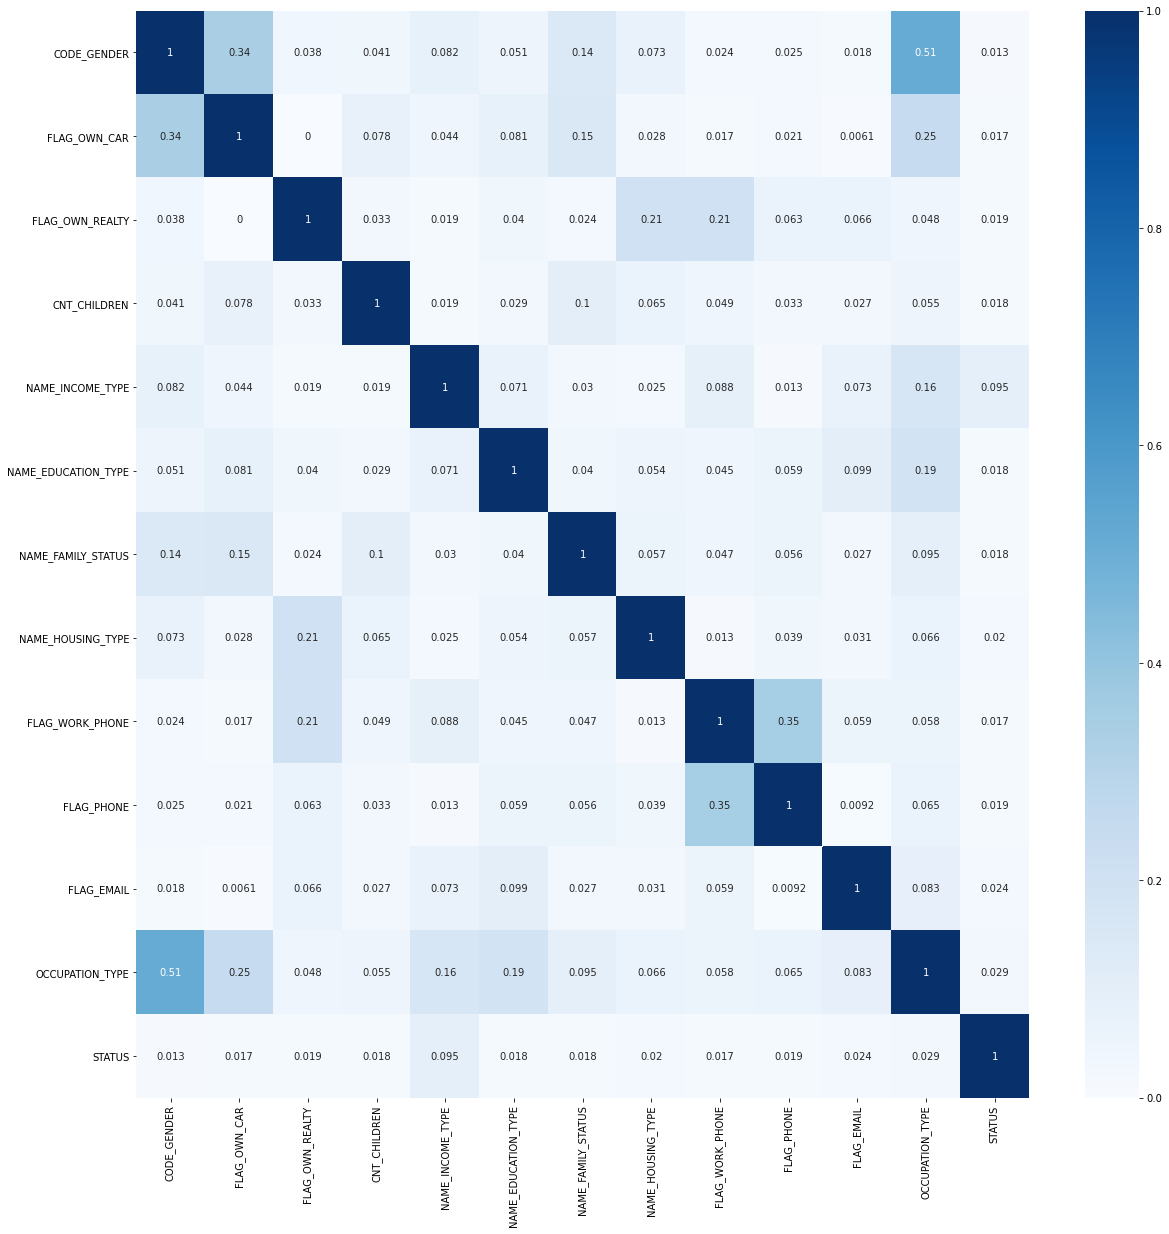

In [24]:
df5 = df3.drop(["ID","AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED","CNT_FAM_MEMBERS","MONTHS_BALANCE"],axis='columns')

def get_corr_mat(df, f=chi2_contingency):
        columns = df.columns
        dm = pd.DataFrame(index=columns, columns=columns)
        for var1, var2 in combinations(columns, 2):
            cont_table = pd.crosstab(df[var1], df[var2], margins=False)
            chi2_stat = cramers_v(cont_table.values)
            dm.loc[var2, var1] = chi2_stat
            dm.loc[var1, var2] = chi2_stat
        dm.fillna(1, inplace=True)
        return dm

def cramers_v(confusion_matrix):
        """ calculate Cramers V statistic for categorial-categorial association.
            uses correction from Bergsma and Wicher,
            Journal of the Korean Statistical Society 42 (2013): 323-328
        """
        chi2 = ss.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_corr= get_corr_mat(df5)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(cat_corr, annot = True, cmap="Blues")
plt.show()

#From the heatmap, most are weakly associated (<0.25) between columns. 
#The highest (0.51) is between Gender & Occupation type
#The next highest are between Gender & Own a car
#Both association lower than moderate (<0.75)

#### 3.5) Categorical & Continuous Variables
We will use strip plot to understand the distribution of each continous variable to each categorical variable.

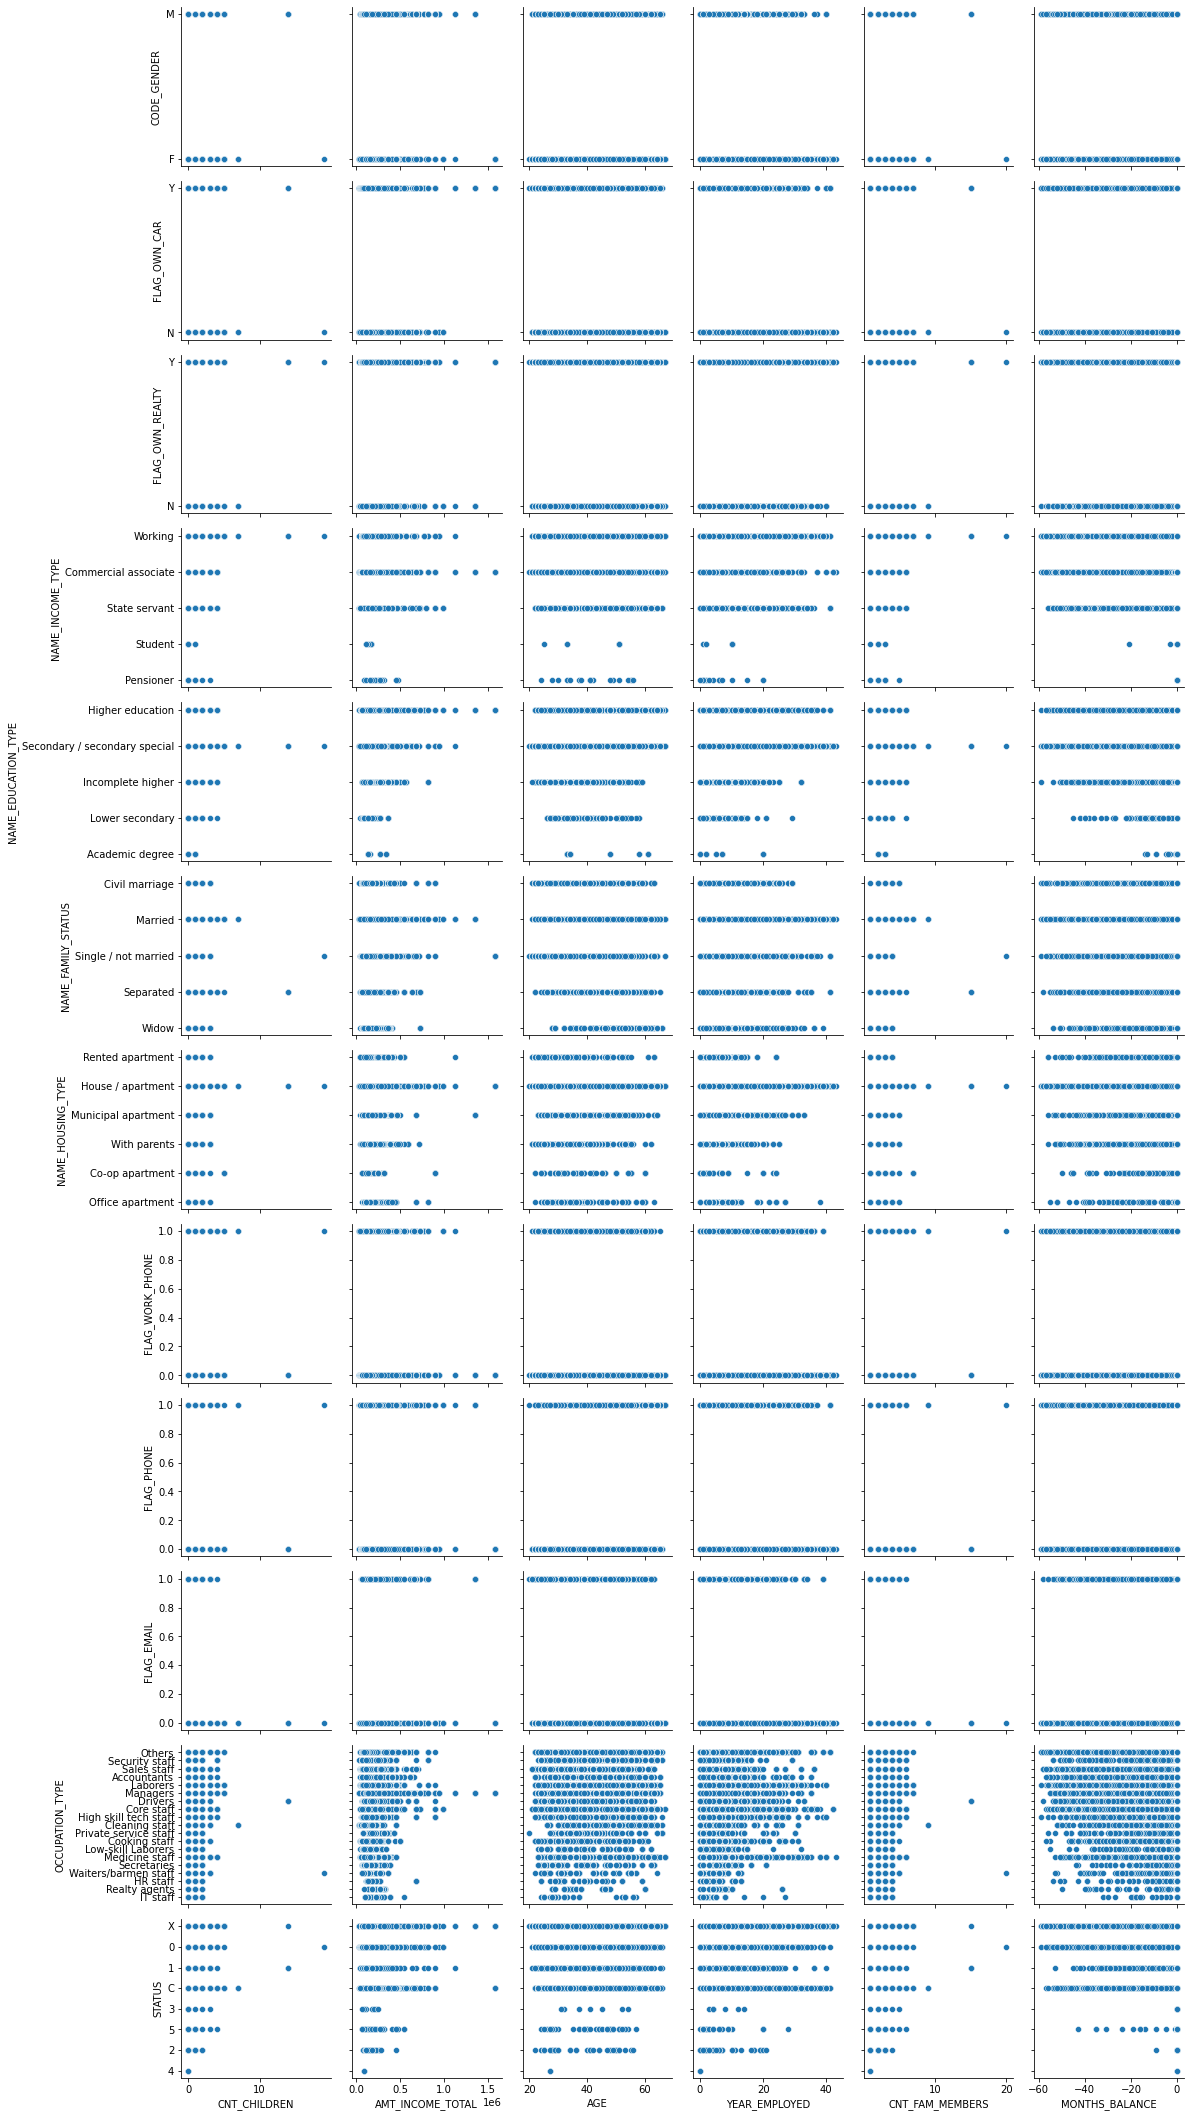

In [25]:
x_con = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AGE","YEAR_EMPLOYED","CNT_FAM_MEMBERS","MONTHS_BALANCE"]
y_cat = ["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE",
         "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL","OCCUPATION_TYPE",
         "STATUS"]

dateSet = datetime(2021,3,24) #Date of the dataset created
df3['AGE'] = (datetime.today() - (dateSet + df3['DAYS_BIRTH'].map(dt.timedelta))) // timedelta(days=365.2425)
df3['YEAR_EMPLOYED'] = (datetime.today() - (dateSet + df3['DAYS_EMPLOYED'].map(dt.timedelta))) // timedelta(days=365.2425)

df6master = df3.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis="columns")

g = sns.PairGrid(
    df6master,
    x_vars= x_con,
    y_vars= y_cat
)
g.map(sns.scatterplot)

plt.show()

### 4) FEATURES ENGINEERING

#### 4.1) Creating Label
We will be creating binary label. 1:Bad Customer 2:Good Customer
- Based on the distrubtion table of the STATUS. We can see that almost 98% users have not more than 29 days overdue (only 2% for >29 days overdue), which is too common, thus, it's inappropriate to be our standard. 
- Whereares is we use >89 days overdue(in most bank standard), its only 0.03%. If we use that, we will leftout many bad customers from our analysis. https://www.investopedia.com/terms/n/nonperformingloan.asp
- Hence, we will define that overdue >1day will be the bad customer 



In [26]:
#Any status >=0 (>1day overdue) will consider as bad customer.

#0,1,2,3,4,5 are classified as 1 because they are the same type
df6master['STATUS'].replace(["0","2","3","4","5"], 1, inplace=True)

#Replace the value C and X with 0 as it is the same type
df6master['STATUS'].replace(["X","C"], 0, inplace=True)

df6master['STATUS'] = df6master['STATUS'].astype('int')

#Verifying whether column only content 1 and 0.
df6master.STATUS.unique()


array([0, 1])

In [27]:
#Remove MONTHS_BALANCE
df6master = df6master.drop("MONTHS_BALANCE", axis="columns")

#### 4.2) Change Categorical Data to Frequency

In [28]:
#Explore the datatypes. Object types are the catergoical features
df6master.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
STATUS                   int64
AGE                      int64
YEAR_EMPLOYED            int64
dtype: object

In [29]:
#We will use frequency encoder as the catergoical datas are all nominal type. 
dfmaster_encoded = df6master.copy()

#Calculate frequency for each column
enc_gender = (dfmaster_encoded.groupby('CODE_GENDER').size()) / len(dfmaster_encoded)
enc_car = (dfmaster_encoded.groupby('FLAG_OWN_CAR').size()) / len(dfmaster_encoded)
enc_realty = (dfmaster_encoded.groupby('FLAG_OWN_REALTY').size()) / len(dfmaster_encoded)
enc_income = (dfmaster_encoded.groupby('NAME_INCOME_TYPE').size()) / len(dfmaster_encoded)
enc_education = (dfmaster_encoded.groupby('NAME_EDUCATION_TYPE').size()) / len(dfmaster_encoded)
enc_family = (dfmaster_encoded.groupby('NAME_FAMILY_STATUS').size()) / len(dfmaster_encoded)
enc_housing = (dfmaster_encoded.groupby('NAME_HOUSING_TYPE').size()) / len(dfmaster_encoded)
enc_occupation = (dfmaster_encoded.groupby('OCCUPATION_TYPE').size()) / len(dfmaster_encoded)

enc_workphone = (dfmaster_encoded.groupby('FLAG_WORK_PHONE').size()) / len(dfmaster_encoded)
enc_phone = (dfmaster_encoded.groupby('FLAG_PHONE').size()) / len(dfmaster_encoded)
enc_email = (dfmaster_encoded.groupby('FLAG_EMAIL').size()) / len(dfmaster_encoded)


#Include frequency back to column
dfmaster_encoded['CODE_GENDER'] = dfmaster_encoded['CODE_GENDER'].apply(lambda x : enc_gender[x])
dfmaster_encoded['FLAG_OWN_CAR'] = dfmaster_encoded['FLAG_OWN_CAR'].apply(lambda x : enc_car[x])
dfmaster_encoded['FLAG_OWN_REALTY'] = dfmaster_encoded['FLAG_OWN_REALTY'].apply(lambda x : enc_realty[x])
dfmaster_encoded['NAME_INCOME_TYPE'] = dfmaster_encoded['NAME_INCOME_TYPE'].apply(lambda x : enc_income[x])
dfmaster_encoded['NAME_EDUCATION_TYPE'] = dfmaster_encoded['NAME_EDUCATION_TYPE'].apply(lambda x : enc_education[x])
dfmaster_encoded['NAME_FAMILY_STATUS'] = dfmaster_encoded['NAME_FAMILY_STATUS'].apply(lambda x : enc_family[x])
dfmaster_encoded['NAME_HOUSING_TYPE'] = dfmaster_encoded['NAME_HOUSING_TYPE'].apply(lambda x : enc_housing[x])
dfmaster_encoded['OCCUPATION_TYPE'] = dfmaster_encoded['OCCUPATION_TYPE'].apply(lambda x : enc_occupation[x])

dfmaster_encoded['FLAG_WORK_PHONE'] = dfmaster_encoded['FLAG_WORK_PHONE'].apply(lambda x : enc_workphone[x])
dfmaster_encoded['FLAG_PHONE'] = dfmaster_encoded['FLAG_PHONE'].apply(lambda x : enc_phone[x])
dfmaster_encoded['FLAG_EMAIL'] = dfmaster_encoded['FLAG_EMAIL'].apply(lambda x : enc_email[x])

dfmaster_encoded

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,AGE,YEAR_EMPLOYED
0,5008804,0.366961,0.414089,0.65253,0,427500.0,0.620638,0.292131,0.084922,0.017974,0.271156,0.703845,0.899182,0.171097,2.0,0,32,12
1,5008805,0.366961,0.414089,0.65253,0,427500.0,0.620638,0.292131,0.084922,0.017974,0.271156,0.703845,0.899182,0.171097,2.0,0,32,12
2,5008806,0.366961,0.414089,0.65253,0,112500.0,0.620638,0.655201,0.697085,0.878999,0.728844,0.703845,0.899182,0.019524,2.0,0,58,3
3,5008808,0.633039,0.585911,0.65253,0,270000.0,0.279995,0.655201,0.136798,0.878999,0.728844,0.296155,0.100818,0.114933,1.0,0,52,8
4,5008809,0.633039,0.585911,0.65253,0,270000.0,0.279995,0.655201,0.136798,0.878999,0.728844,0.296155,0.100818,0.114933,1.0,0,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,0.366961,0.414089,0.65253,0,315000.0,0.620638,0.655201,0.697085,0.878999,0.728844,0.703845,0.899182,0.099334,2.0,0,47,6
434809,5149834,0.633039,0.585911,0.65253,0,157500.0,0.279995,0.292131,0.697085,0.878999,0.728844,0.296155,0.100818,0.039806,2.0,0,34,3
434810,5149838,0.633039,0.585911,0.65253,0,157500.0,0.000561,0.292131,0.697085,0.878999,0.728844,0.296155,0.100818,0.039806,2.0,0,34,3
434811,5150049,0.633039,0.585911,0.65253,0,283500.0,0.620638,0.655201,0.697085,0.878999,0.728844,0.703845,0.899182,0.114933,2.0,1,49,1


#### 4.3) Checking Data Unbalance

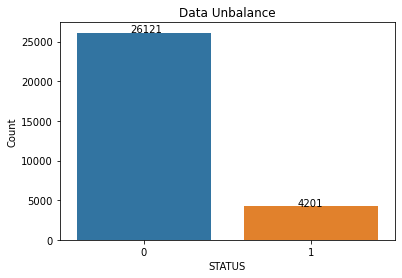

In [30]:
#The dataset is imbalanced. 
#Classification model will give a false accuracy rate as the prediction uses the most common class without performing any analysis of the features. 
#We will use Synthetic Minority Oversampling TEchnique (SMOTE) to make the dataset balance.
ax = sns.countplot(x="STATUS", data=dfmaster_encoded)

plt.title('Data Unbalance')
plt.xlabel('STATUS')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.32, p.get_height()+30))

plt.show()  

In [31]:
#Define predictor features and target feature
cols = ['CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL',
        'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
        'FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','AGE','YEAR_EMPLOYED']

target = "STATUS"


#Define X and Y
X = dfmaster_encoded[cols]
y = dfmaster_encoded[target]

In [32]:
#Split the data for 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

#Fit and transform the data into a scaler for accurate reading and results.
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

#Oversamplr to make dataset balance
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced= oversample.fit_resample(X_test_scaled, y_test)


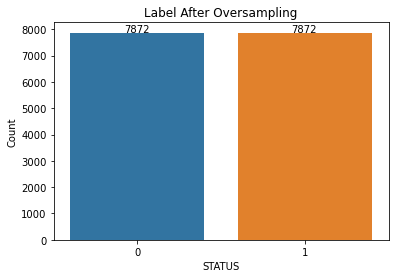

In [33]:
#Visualizing Oversampling results. Our dataset is now balanced.
test = pd.DataFrame(y_test_balanced , columns = ['STATUS'])
ax = sns.countplot(x="STATUS", data=test)

plt.title('Label After Oversampling')
plt.xlabel('STATUS')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.32, p.get_height()+30))

plt.show() 

### 5) MACHINE LEARNING

For classification model, we will try the listed models.
- 5.1) Logistic Regression
- 5.2) SVM
- 5.3) Random Forest
- 5.4) XG boost

We will evaluate the model with the listed tests:
* ROC / AUC
* Recall
* Precision
* F1-Score
* Accuracy

#### 5.1) Logistic Regression

In [34]:
#Train the model
model1 = LogisticRegression()
logit = model1.fit(X_balanced, y_balanced)

In [35]:
#Predictions
y_pred_logit = model1.predict(X_test_balanced) 

In [36]:
#Scores
log_acc = metrics.accuracy_score(y_test_balanced , y_pred_logit)
log_f1 = metrics.f1_score(y_test_balanced , y_pred_logit)

print("Accuracy Logit:", log_acc)
print("Precision Logit:",metrics.precision_score(y_test_balanced , y_pred_logit))
print("Recall Logit:",metrics.recall_score(y_test_balanced , y_pred_logit))
print("F1 Score Logit:", log_f1)

Accuracy Logit: 0.5274390243902439
Precision Logit: 0.5262518230432669
Recall Logit: 0.5500508130081301
F1 Score Logit: 0.537888198757764


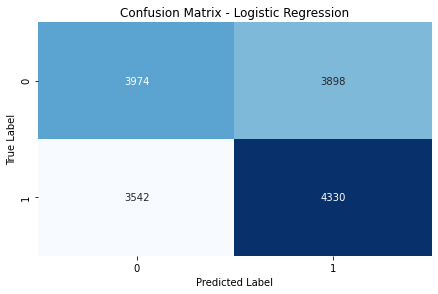

In [37]:
#Print CM
matrix_logit = confusion_matrix(y_test_balanced , y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['0', '1'], columns=['0', '1'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix - Logistic Regression"), plt.tight_layout()
plt.ylabel("True Label"), plt.xlabel("Predicted Label")
plt.show()

In [38]:
#AUC
y_pred_logit_proba = model1.predict_proba(X_test_balanced)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test_balanced,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test_balanced, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.5313058107179299


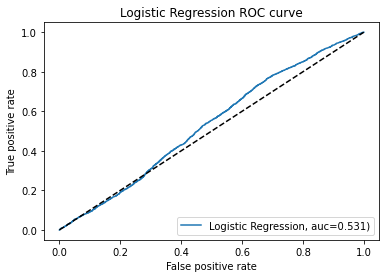

In [39]:
#ROC
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

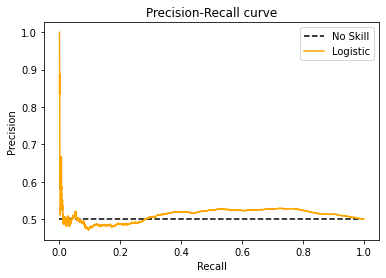

In [40]:
#Precision-Recall
logit_precision, logit_recall, _ = precision_recall_curve(y_test_balanced, y_pred_logit_proba)
no_skill = len(y_test_balanced[y_test_balanced==1]) / len(y_test_balanced)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(logit_recall, logit_precision, color='orange', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#### 5.2) Support Vector Machine

In [41]:
#Train the model
model2 = SVC(probability=True, kernel='linear')
svm = model2.fit(X_balanced, y_balanced)

In [42]:
#Predictions
y_pred_svm = model2.predict(X_test_balanced)

In [43]:
#Scores
svm_acc = metrics.accuracy_score(y_test_balanced, y_pred_svm)
svm_f1 = metrics.f1_score(y_test_balanced, y_pred_svm)

print("Accuracy SVM:", svm_acc)
print("Precision SVM:",metrics.precision_score(y_test_balanced, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test_balanced, y_pred_svm))
print("F1 Score SVM:", svm_f1)

Accuracy SVM: 0.5352515243902439
Precision SVM: 0.5296506036969761
Recall SVM: 0.6297002032520326
F1 Score SVM: 0.5753583657361732


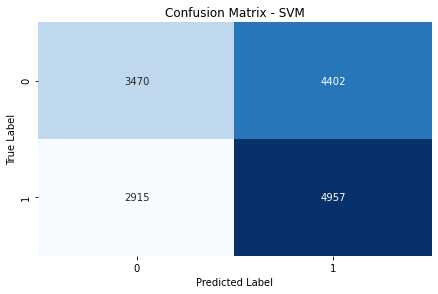

In [44]:
#Print CM
matrix_svm = confusion_matrix(y_test_balanced , y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['0', '1'], columns=['0', '1'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix - SVM"), plt.tight_layout()
plt.ylabel("True Label"), plt.xlabel("Predicted Label")
plt.show()

In [45]:
#AUC
y_pred_svm_proba = model2.predict_proba(X_test_balanced)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test_balanced,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test_balanced, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.531083519944622


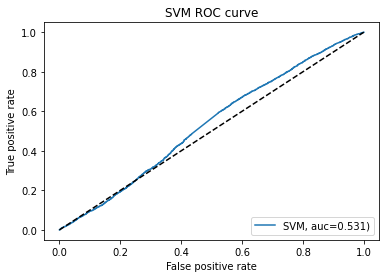

In [46]:
#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

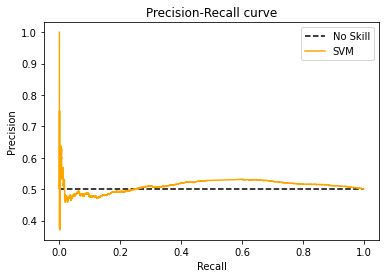

In [47]:
#Precision-Recall
svm_precision, svm_recall, _ = precision_recall_curve(y_test_balanced, y_pred_svm_proba)
no_skill = len(y_test_balanced[y_test_balanced==1]) / len(y_test_balanced)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#### 5.3) Random Forest

In [48]:
#Train the model
model3 = RandomForestClassifier()
rf = model3.fit(X_balanced, y_balanced)

In [49]:
#Predictions
y_pred_rf = model3.predict(X_test_balanced)

In [50]:
#Scores
rf_acc = metrics.accuracy_score(y_test_balanced, y_pred_rf)
rf_f1 = metrics.f1_score(y_test_balanced, y_pred_rf)

print("Accuracy RF:", rf_acc)
print("Precision RF:",metrics.precision_score(y_test_balanced, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test_balanced, y_pred_rf))
print("F1 Score RF:", rf_f1)

Accuracy RF: 0.8508003048780488
Precision RF: 0.9053280493174812
Recall RF: 0.7835365853658537
F1 Score RF: 0.8400408580183861


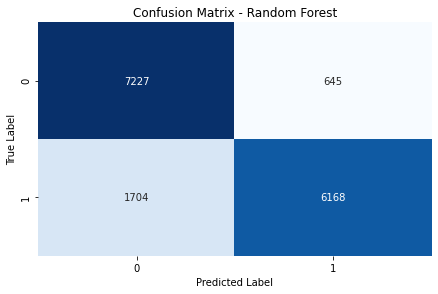

In [51]:
#CM matrix
matrix_rf = confusion_matrix(y_test_balanced, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['0', '1'], columns=['0', '1'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix - Random Forest"), plt.tight_layout()
plt.ylabel("True Label"), plt.xlabel("Predicted Label")
plt.show()

In [52]:
#AUC
y_pred_rf_proba = model3.predict_proba(X_test_balanced)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test_balanced,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test_balanced, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9145615367346034


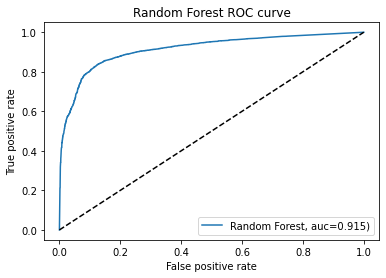

In [53]:
#ROC
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

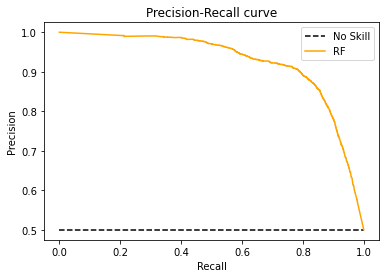

In [54]:
#Precision-Recall
rf_precision, rf_recall, _ = precision_recall_curve(y_test_balanced, y_pred_rf_proba)
no_skill = len(y_test_balanced[y_test_balanced==1]) / len(y_test_balanced)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(rf_recall, rf_precision, color='orange', label='RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#### 5.4) XG Boost

In [55]:
#Train the model
model4 = XGBClassifier(objective='binary:logistic')
xgboost = model4.fit(X_balanced, y_balanced)

In [56]:
#Predictions
y_pred_xgb = model4.predict(X_test_balanced) 

In [57]:
#Scores
xgb_acc = metrics.accuracy_score(y_test_balanced, y_pred_xgb)
xgb_f1 = metrics.f1_score(y_test_balanced, y_pred_xgb)

print("Accuracy XGB:", xgb_acc)
print("Precision XGB:",metrics.precision_score(y_test_balanced, y_pred_xgb))
print("Recall XGB:",metrics.recall_score(y_test_balanced, y_pred_xgb))
print("F1 Score XGB:", xgb_f1)

Accuracy XGB: 0.8913871951219512
Precision XGB: 0.9553650605971031
Recall XGB: 0.8211382113821138
F1 Score XGB: 0.8831807623992349


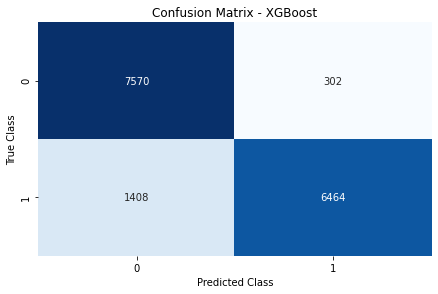

In [58]:
#CM matrix
matrix_xgb = confusion_matrix(y_test_balanced, y_pred_xgb)
cm_xgb = pd.DataFrame(matrix_xgb, index=['0', '1'], columns=['0', '1'])

sns.heatmap(cm_xgb, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix - XGBoost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [59]:
#AUC
y_pred_xgb_proba = model4.predict_proba(X_test_balanced)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test_balanced,  y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(y_test_balanced, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)

AUC XGBoost : 0.9289825518122273


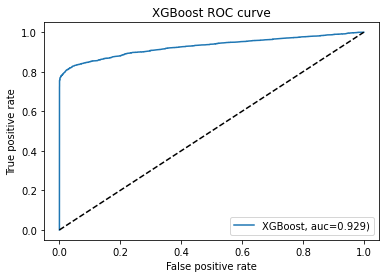

In [60]:
#ROC
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, auc={:.3f})".format(auc_xgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc=4)
plt.show()

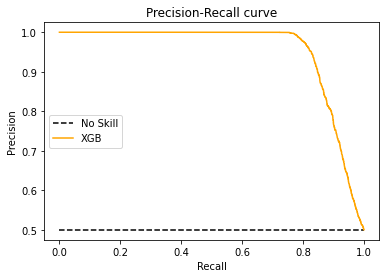

In [61]:
#Precision-Recall
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test_balanced, y_pred_xgb_proba)
no_skill = len(y_test_balanced[y_test_balanced==1]) / len(y_test_balanced)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(xgb_recall, xgb_precision, color='orange', label='XGB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#### 5.5) Result Comparison
Random Forest and XG Boost has the close and best performance according to our three most important classification metrics (Accuracy, F1-score and AUC). Next, we can further improved the both models by tuning hyper-parameters.

In [62]:
print("RESULT COMPARISON TABLE")
print("=======================")

d = {"Accuracy": [log_acc, svm_acc, rf_acc, xgb_acc], 
     "F1 Score": [log_f1, svm_f1, rf_f1, xgb_f1],
     "AUC     ": [auc_logit, auc_svm, auc_rf, auc_xgb]}
     
print ("Test Method:\tLog \tSVM \tRF \tXGB")
     
for k, v in d.items():
     LOG, SVM, RF, XGB = v
     print(k,"\t%.3f"%LOG,"\t%.3f"%SVM,"\t%.3f"%RF,"\t%.3f"%XGB)

RESULT COMPARISON TABLE
Test Method:	Log 	SVM 	RF 	XGB
Accuracy 	0.527 	0.535 	0.851 	0.891
F1 Score 	0.538 	0.575 	0.840 	0.883
AUC      	0.531 	0.531 	0.915 	0.929


### 6) HYPER-PARAMETER TUNING

### 6.1) XG Boost Tuning
Parameter Tuning approach:
https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

#### 6.1.1) Define DMatrix, Baseline Parameters, Evalution Metric and Max No. of Boosting Rounds

In [63]:
#Set Dmatrix for training and test set
dtrain = xgb.DMatrix(X_balanced, label=y_balanced)
dtest = xgb.DMatrix(X_test_balanced, label=y_test_balanced)

#Default parameters that we are going to tune.
params = {'max_depth':6,
          'min_child_weight': 1,
          'eta':.3,
          'subsample': 1,
          'colsample_bytree': 1,
          'objective':'binary:logistic'}

#Add the evaluation metric (Error) we are interested in to our params
params['eval_metric'] = "error"


#Maximum number of boosting rounds that we allow
num_boost_round = 999

In [64]:
#Find best error for baseline
model4_tune = xgb.train(params,
                  dtrain,
                  num_boost_round=num_boost_round,
                  evals=[(dtest, "Test")],
                  early_stopping_rounds=10
)

[0]	Test-error:0.26740
Will train until Test-error hasn't improved in 10 rounds.
[1]	Test-error:0.23539
[2]	Test-error:0.22555
[3]	Test-error:0.19461
[4]	Test-error:0.16101
[5]	Test-error:0.15949
[6]	Test-error:0.14983
[7]	Test-error:0.14215
[8]	Test-error:0.14037
[9]	Test-error:0.13707
[10]	Test-error:0.13510
[11]	Test-error:0.13535
[12]	Test-error:0.13230
[13]	Test-error:0.13027
[14]	Test-error:0.12824
[15]	Test-error:0.12640
[16]	Test-error:0.12608
[17]	Test-error:0.12424
[18]	Test-error:0.12278
[19]	Test-error:0.12036
[20]	Test-error:0.11986
[21]	Test-error:0.11928
[22]	Test-error:0.11833
[23]	Test-error:0.11839
[24]	Test-error:0.11897
[25]	Test-error:0.11770
[26]	Test-error:0.11725
[27]	Test-error:0.11814
[28]	Test-error:0.11662
[29]	Test-error:0.11814
[30]	Test-error:0.11719
[31]	Test-error:0.11604
[32]	Test-error:0.11624
[33]	Test-error:0.11535
[34]	Test-error:0.11579
[35]	Test-error:0.11522
[36]	Test-error:0.11503
[37]	Test-error:0.11433
[38]	Test-error:0.11382
[39]	Test-error:

In [65]:
#Print best error before tune (baseline)
print("Best Error: {:.2f} with {} rounds".format(
                 model4_tune.best_score,
                 model4_tune.best_iteration+1))

Best Error: 0.11 with 69 rounds


#### 6.1.2) Tune Max_Depth and Min_Child_Weight
- Min_child_weight
    - Defines the minimum sum of weights of all observations required in a child.
    - Used to control over-fitting and under-fitting.

- Max_depth
    - The maximum depth of a tree.
    - Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

In [66]:
#Set a list containing all the combinations max_depth/min_child_weight for testing.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,11)
    for min_child_weight in range(0,2)
]

In [67]:
# Define initial best params and error
min_error = float("Inf")
best_params = None

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=27,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    
    # Update best error
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,min_child_weight)
        
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with max_depth=3, min_child_weight=0
	Error 0.12743140000000003 for 478 rounds
CV with max_depth=3, min_child_weight=1
	Error 0.1414868 for 228 rounds
CV with max_depth=4, min_child_weight=0
	Error 0.12323899999999999 for 212 rounds
CV with max_depth=4, min_child_weight=1
	Error 0.1149376 for 310 rounds
CV with max_depth=5, min_child_weight=0
	Error 0.10411519999999999 for 330 rounds
CV with max_depth=5, min_child_weight=1
	Error 0.10759460000000001 for 229 rounds
CV with max_depth=6, min_child_weight=0
	Error 0.1021698 for 214 rounds
CV with max_depth=6, min_child_weight=1
	Error 0.10142999999999999 for 224 rounds
CV with max_depth=7, min_child_weight=0
	Error 0.10247120000000001 for 112 rounds
CV with max_depth=7, min_child_weight=1
	Error 0.09934760000000001 for 148 rounds
CV with max_depth=8, min_child_weight=0
	Error 0.09929279999999999 for 120 rounds
CV with max_depth=8, min_child_weight=1
	Error 0.0991008 for 120 rounds
CV with max_depth=9, min_child_weight=0
	Error 0.0991556

In [68]:
#Update parameter with the best max_depth & min_child_weight
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

#### 6.1.3) Tune Subsample and Colsample_Bytree
- Subsample
    - Denotes the fraction of observations to be randomly samples for each tree

- Colsample_bytree 
    - Denotes the fraction of columns to be randomly samples for each tree.

In [69]:
#Set testing range for Subsample and Colsample
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)]
]

In [70]:
min_error = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=27,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    
    # Update best score
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (subsample,colsample)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_error))

CV with subsample=0.9, colsample=0.9
	Error 0.0989642 for 66 rounds
CV with subsample=0.9, colsample=0.8
	Error 0.0998684 for 70 rounds
CV with subsample=0.9, colsample=0.7
	Error 0.0991832 for 82 rounds
CV with subsample=0.9, colsample=0.6
	Error 0.09858039999999998 for 82 rounds
CV with subsample=0.9, colsample=0.5
	Error 0.0979774 for 79 rounds
CV with subsample=0.8, colsample=0.9
	Error 0.10011460000000001 for 63 rounds
CV with subsample=0.8, colsample=0.8
	Error 0.1003338 for 52 rounds
CV with subsample=0.8, colsample=0.7
	Error 0.10008759999999998 for 58 rounds
CV with subsample=0.8, colsample=0.6
	Error 0.09912839999999999 for 77 rounds
CV with subsample=0.8, colsample=0.5
	Error 0.0993476 for 81 rounds
CV with subsample=0.7, colsample=0.9
	Error 0.10005979999999999 for 85 rounds
CV with subsample=0.7, colsample=0.8
	Error 0.0995942 for 77 rounds
CV with subsample=0.7, colsample=0.7
	Error 0.1007176 for 59 rounds
CV with subsample=0.7, colsample=0.6
	Error 0.10085439999999998 fo

In [71]:
#Update parameter with the best subsample & colsample
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

#### 6.1.4) Tune ETA
- Parameter controls the learning rate. Makes the model more robust by shrinking the weights on each step

In [72]:
min_error = float("Inf")
best_params = None

#Set list of values for testing
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    
    # We update our parameters
    params['eta'] = eta
    
    # Run and time CV
    cv_results = xgb.cv(params,
                        dtrain,
                        num_boost_round=num_boost_round,
                        seed=27,
                        nfold=5,
                        metrics=['error'],
                        early_stopping_rounds=10
                       )
    
    # Update best score
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds\n".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = eta
print("Best params: {}, Error: {}".format(best_params, min_error))

CV with eta=0.3
	Error 0.0979774 for 79 rounds

CV with eta=0.2
	Error 0.10016939999999999 for 75 rounds

CV with eta=0.1
	Error 0.098142 for 168 rounds

CV with eta=0.05
	Error 0.0999502 for 264 rounds

CV with eta=0.01
	Error 0.16617339999999997 for 13 rounds

CV with eta=0.005
	Error 0.1679542 for 13 rounds

Best params: 0.3, Error: 0.0979774


In [73]:
#Update parameter with the best ETA
params['eta'] = best_params

#### 6.1.5) Tuned Parameters

In [74]:
#Check on our final parameters.
params

{'max_depth': 10,
 'min_child_weight': 1,
 'eta': 0.3,
 'subsample': 0.9,
 'colsample_bytree': 0.5,
 'objective': 'binary:logistic',
 'eval_metric': 'error'}

In [75]:
#Find best error
model4_tune = xgb.train(params,
                  dtrain,
                  num_boost_round=num_boost_round,
                  evals=[(dtest, "Test")],
                  early_stopping_rounds=10
)

[0]	Test-error:0.25013
Will train until Test-error hasn't improved in 10 rounds.
[1]	Test-error:0.20452
[2]	Test-error:0.18502
[3]	Test-error:0.17073
[4]	Test-error:0.15307
[5]	Test-error:0.15028
[6]	Test-error:0.14285
[7]	Test-error:0.13332
[8]	Test-error:0.12741
[9]	Test-error:0.12468
[10]	Test-error:0.12475
[11]	Test-error:0.12392
[12]	Test-error:0.12335
[13]	Test-error:0.12214
[14]	Test-error:0.11979
[15]	Test-error:0.11579
[16]	Test-error:0.11636
[17]	Test-error:0.11579
[18]	Test-error:0.11446
[19]	Test-error:0.11268
[20]	Test-error:0.11261
[21]	Test-error:0.11268
[22]	Test-error:0.11471
[23]	Test-error:0.11357
[24]	Test-error:0.11160
[25]	Test-error:0.11173
[26]	Test-error:0.11090
[27]	Test-error:0.10938
[28]	Test-error:0.10950
[29]	Test-error:0.10772
[30]	Test-error:0.10868
[31]	Test-error:0.10804
[32]	Test-error:0.10766
[33]	Test-error:0.10779
[34]	Test-error:0.10912
[35]	Test-error:0.10925
[36]	Test-error:0.10779
[37]	Test-error:0.10772
[38]	Test-error:0.10747
[39]	Test-error:

In [76]:
#Print best error after tune
print("Best Error: {:.2f} with {} rounds".format(
                 model4_tune.best_score,
                 model4_tune.best_iteration+1))

print('Improvement of {:0.2f}%.'.format( 100 * (model4_tune.best_score - model4_tune.best_score) / model4_tune.best_score))

Best Error: 0.11 with 39 rounds
Improvement of 0.00%.


In [85]:
#Load tuned parameters into XGB Classfier
model4_tuned = XGBClassifier(max_depth=10,
                             min_child_weight=1,
                             eta=0.3,
                             subsample=0.9,
                             colsample_bytree=0.5,
                             objective='binary:logistic',
                             eval_metric='error'
                            )

xgb = model4_tuned.fit(X_balanced, y_balanced)

Text(0, 0.5, 'Feature Importance Score')

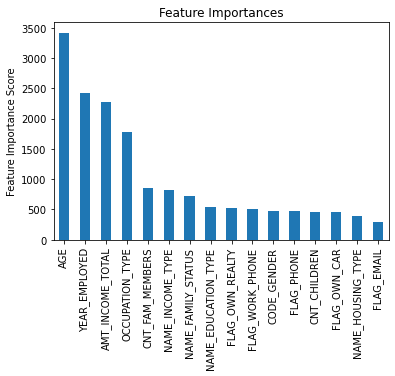

In [86]:
#Plot feature importance 
feat_imp = pd.Series(model4_tuned.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

#From feature importance score, all features have contribution to our target. Therefore, no need to remove any feature to improve the model

In [87]:
#Prediction for tuned model
y_pred_xgb = model4_tuned.predict(X_test_balanced) 

In [88]:
#Scores
xgb_acc_2 = metrics.accuracy_score(y_test_balanced, y_pred_xgb)
xgb_f1_2 = metrics.f1_score(y_test_balanced, y_pred_xgb)

#AUC
y_pred_xgb_proba = model4_tuned.predict_proba(X_test_balanced)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test_balanced,  y_pred_xgb_proba)
auc_xgb_2 = metrics.roc_auc_score(y_test_balanced, y_pred_xgb_proba)

In [89]:
#Print before tune and after tune result for comparison
print("XGBOOST BEFORE/AFTER TABLE")
print("=======================")

d = {"Accuracy": [xgb_acc, xgb_acc_2], 
     "F1 Score": [xgb_f1, xgb_f1_2],
     "AUC     ": [auc_xgb, auc_xgb_2]}
     
print ("Test Method:\tBefore \tAfter")
     
for k, v in d.items():
     BEF, AFT = v
     print(k,"\t%.3f"%BEF,"\t%.3f"%AFT)
    

XGBOOST BEFORE/AFTER TABLE
Test Method:	Before 	After
Accuracy 	0.891 	0.891
F1 Score 	0.883 	0.886
AUC      	0.929 	0.935


#### 6.2) Random Forest Tuning
For tuning hyperparameter for Random Forest, we will use Randomsearch to get the parameter range.
Then, we will use gridsearch with cross validation to further select the best parameter.

Approach: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [90]:
#Current Random Forest parameter
model3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 6.2.1) Define initial params range with RandomSearch

In [91]:
#Define inital starting range for parameter

# Number of trees in random forest
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree

bootstrap = [True, False]

#Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [92]:
#Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2,
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_balanced, y_balanced)

#Show parameters after RandomSearch
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 59.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 115.3min finished


{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 90,
 'bootstrap': False}

In [93]:
#Define function to calculate error and accuracy
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(np.isinf(errors / y_test_balanced))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

#Baseline
base_accuracy = evaluate(model3, X_test_balanced, y_test_balanced)

#Random
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_balanced, y_test_balanced)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.1492 degrees.
Accuracy = 95.90%.
Model Performance
Average Error: 0.1457 degrees.
Accuracy = 96.38%.
Improvement of 0.50%.


#### 6.2.2) Getting Best Params from GridSearch

In [94]:
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [600],
              'min_samples_split': [2],
              'min_samples_leaf': [1],
              'max_features': ['log2'],
              'max_depth': [90],
              'bootstrap': [False]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestClassifier(), 
                           param_grid = param_grid, 
                           cv = 3, 
                           n_jobs = -1, 
                           verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_balanced, y_balanced)

#Show best parameters after GridSearch
grid_search.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.8s finished


{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [95]:
#GridSearch
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_balanced, y_test_balanced)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

#It seems we have about maxed out performance.

Model Performance
Average Error: 0.1453 degrees.
Accuracy = 96.37%.
Improvement of 0.48%.


#### 6.2.3) Tuned Parameters

In [96]:
#Load tuned parameters into RandomForestClassifier
model3_tuned = RandomForestClassifier(n_estimators= 600,
                                      max_features= 'log2',
                                      max_depth= 90,
                                      min_samples_split= 2,
                                      min_samples_leaf= 1,
                                      bootstrap= False)
  
rf = model3_tuned.fit(X_balanced, y_balanced)

Text(0, 0.5, 'Feature Importance Score')

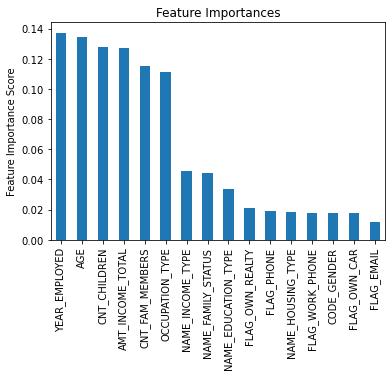

In [97]:
#Plot feature importance 
feat_imp = pd.Series(model3_tuned.feature_importances_, index=X_balanced.columns.tolist()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

#From feature importance score, all features have contribution to our target. 
#Therefore, no need to remove any feature to improve the model

In [98]:
#Prediction for tuned model
y_pred_rf = model3_tuned.predict(X_test_balanced) 

In [99]:
#Scores
rf_acc_2 = metrics.accuracy_score(y_test_balanced, y_pred_rf)
rf_f1_2 = metrics.f1_score(y_test_balanced, y_pred_rf)

#AUC
y_pred_rf_proba = model3_tuned.predict_proba(X_test_balanced)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test_balanced,  y_pred_rf_proba)
auc_rf_2 = metrics.roc_auc_score(y_test_balanced, y_pred_rf_proba)

In [100]:
#Print before tune and after tune result for comparison
print("RANDOM FOREST BEFORE/AFTER TABLE")
print("=======================")

d = {"Accuracy": [rf_acc, rf_acc_2], 
     "F1 Score": [rf_f1, rf_f1_2],
     "AUC     ": [auc_rf, auc_rf_2]}
     
print ("Test Method:\tBefore \tAfter")
     
for k, v in d.items():
     BEF, AFT = v
     print(k,"\t%.3f"%BEF,"\t%.3f"%AFT)

RANDOM FOREST BEFORE/AFTER TABLE
Test Method:	Before 	After
Accuracy 	0.851 	0.854
F1 Score 	0.840 	0.843
AUC      	0.915 	0.905


### 7) CONCLUSION
The best model to identify good/bad applicant for credit card approval will be XGBoost model with test of ~89% accuracy.
We will be using XGBoost to predict our values. For futurework, we can look into using emsemble of XGBoost and Random Forest to get a more accurate prediction 

In [102]:
#Print before tune and after tune result for comparison
print("RANDOM FOREST BEFORE/AFTER TABLE")
print("=======================")

d = {"Accuracy": [rf_acc_2, xgb_acc_2], 
     "F1 Score": [rf_f1_2, xgb_f1_2],
     "AUC     ": [auc_rf_2, auc_xgb_2]}
     
print ("Test Method:\tRF \tXGB")
     
for k, v in d.items():
     BEF, AFT = v
     print(k,"\t%.3f"%BEF,"\t%.3f"%AFT)

RANDOM FOREST BEFORE/AFTER TABLE
Test Method:	RF 	XGB
Accuracy 	0.854 	0.891
F1 Score 	0.843 	0.886
AUC      	0.905 	0.935


## THE END